<a href="https://colab.research.google.com/github/GusdPaula/Python/blob/main/Projeto%2Binicial%2B_%2BClassifica%C3%A7%C3%A3o%2B_%2BValida%C3%A7%C3%A3o%2Be%2Bm%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [65]:
import pandas as pd

In [66]:
dados = pd.read_csv('emp_automovel.csv')
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [67]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)

DecisionTreeClassifier()

In [70]:
modelo.score(x, y)

1.0

In [71]:
print(f' Acurácia: {modelo.score(x, y)}')

 Acurácia: 1.0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [74]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=10)

In [75]:
modelo.score(x_treino, y_treino)

0.9205574912891986

In [76]:
modelo.score(x_val, y_val)

0.9059315390645414

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10358   121]
 [  959    43]]


In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

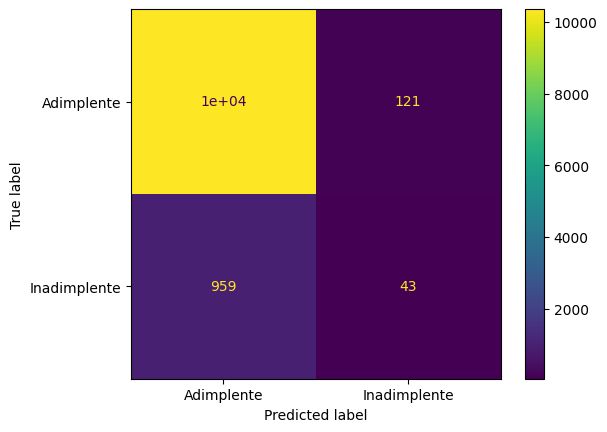

In [80]:
visualizacao = ConfusionMatrixDisplay(matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
modelo_desafio = RandomForestClassifier(max_depth = 10)

In [83]:
modelo_desafio.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10)

In [84]:
modelo_desafio.score(x_val, y_val)

0.9128995732079087

In [85]:
y_previsto_desafio = modelo_desafio.predict(x_val)
matriz_confusao_desafio = confusion_matrix(y_val, y_previsto_desafio)
print(matriz_confusao_desafio)

[[10478     1]
 [  999     3]]


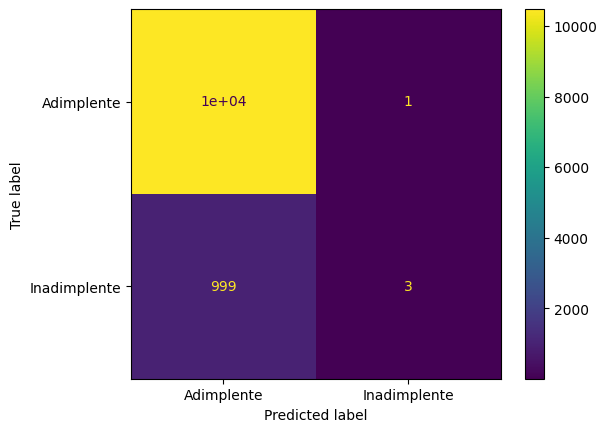

In [86]:
visualizacao_desafio = ConfusionMatrixDisplay(matriz_confusao_desafio, display_labels=['Adimplente', 'Inadimplente'])
visualizacao_desafio.plot();

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9059315390645414


In [89]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.2621951219512195


In [90]:
print(f'Recall: {recall_score(y_val, y_previsto)}')

Recall: 0.04291417165668663


In [91]:
print(f'F1 Score: {f1_score(y_val, y_previsto)}')

F1 Score: 0.0737564322469983


In [92]:
from sklearn.metrics import RocCurveDisplay

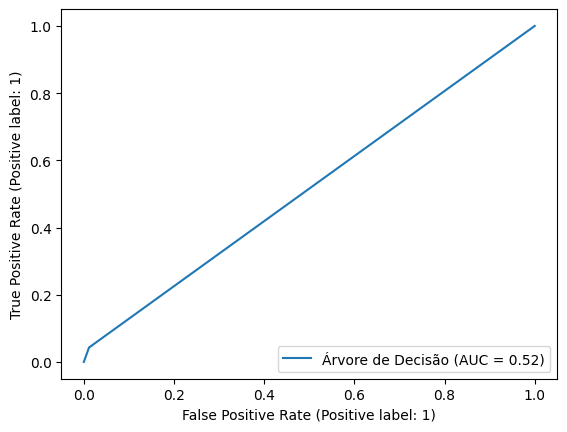

In [93]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.515683634163108


In [96]:
from sklearn.metrics import PrecisionRecallDisplay

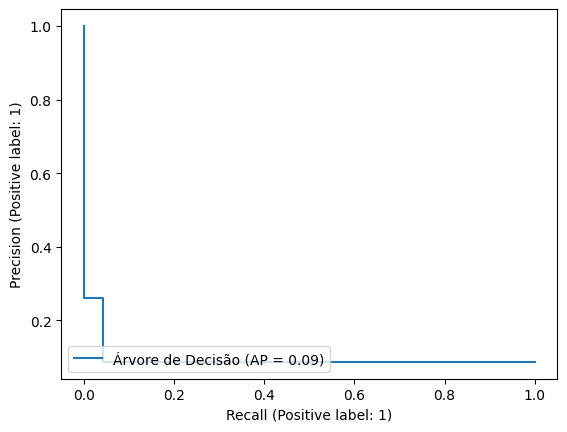

In [97]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

In [98]:
from sklearn.metrics import average_precision_score

In [99]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09478119576457607


In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [102]:
from sklearn.model_selection import cross_validate, KFold

In [103]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=kf)
cv_resultados

{'fit_time': array([0.35801029, 0.5289557 , 0.59145403, 0.5241816 , 0.70955801]),
 'score_time': array([0.01683044, 0.0137167 , 0.028018  , 0.02084017, 0.00610113]),
 'test_score': array([0.91268372, 0.90853659, 0.90744774, 0.91387195, 0.89884582])}

In [104]:
media = cv_resultados['test_score'].mean()
media

0.9082771628109002

In [105]:
desvio_padrao = cv_resultados['test_score'].std()
desvio_padrao

0.005299527033817279

In [106]:
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8976781087432657, 0.9188762168785347]


In [107]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.56218553, 0.63601398, 0.64675975, 0.62774062, 0.98977804]),
 'score_time': array([0.02326298, 0.03457999, 0.03669333, 0.03374648, 0.05869484]),
 'test_score': array([0.02509908, 0.01980198, 0.0196802 , 0.01697128, 0.02543353])}

In [108]:
media = cv_resultados['test_score'].mean()
media

0.021397211536428512

In [109]:
desvio_padrao = cv_resultados['test_score'].std()
desvio_padrao

0.003318957908111351

In [110]:
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


Intervalo de confiança: [0.01475929572020581, 0.028035127352651214]


In [111]:
from sklearn.model_selection import StratifiedKFold

In [123]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [124]:
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.35237908, 0.36067796, 0.34987378, 0.32861567, 0.3359437 ]),
 'score_time': array([0.0130794 , 0.01322532, 0.01371837, 0.01268935, 0.01438951]),
 'test_score': array([0.03491272, 0.02871411, 0.02992519, 0.02493766, 0.02743142])}

In [125]:
media = cv_resultados['test_score'].mean()
media

0.02918421798188673

In [126]:
desvio_padrao = cv_resultados['test_score'].std()
desvio_padrao

0.003307305231529462

In [127]:
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


Intervalo de confiança: [0.022569607518827806, 0.035798828444945655]


In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
oversample = SMOTE()

In [119]:
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [120]:
y_balanceado.value_counts(normalize=True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [121]:
modelo.fit(x, y)

DecisionTreeClassifier(max_depth=10)

In [122]:
modelo.score(x_val, y_val)

0.9187353018029788

In [128]:
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.80166483, 0.88614178, 1.33164644, 1.10817695, 0.66407394]),
 'score_time': array([0.01937222, 0.04175329, 0.01858974, 0.01950383, 0.01810312]),
 'test_score': array([0.74862801, 0.74194703, 0.7203865 , 0.7312418 , 0.70019089])}

In [129]:
media = cv_resultados['test_score'].mean()
media

0.7284788444692112

In [130]:
desvio_padrao = cv_resultados['test_score'].std()
desvio_padrao

0.017092159743513222

In [131]:
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.6942945249821847, 0.7626631639562377]


In [132]:
from imblearn.pipeline import Pipeline as imb_pipeline

In [134]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imb_pipeline([('oversample', SMOTE()), ('arvore', modelo)])


In [135]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.97601485, 0.74314213, 0.71680617, 0.70047641, 0.72058296]),
 'score_time': array([0.01306581, 0.01274443, 0.01241136, 0.01237679, 0.01428246]),
 'test_score': array([0.28678304, 0.27091136, 0.24314214, 0.25561097, 0.21197007])}

In [136]:
media = cv_resultados['test_score'].mean()
media

0.2536835190425933

In [137]:
desvio_padrao = cv_resultados['test_score'].std()
desvio_padrao

0.025484207103998218

In [138]:
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.20271510483459684, 0.3046519332505897]


In [139]:
from imblearn.under_sampling import NearMiss

In [140]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imb_pipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.6269197510275631, 0.6985817262405648]


In [141]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [142]:
modelo.fit(x_balanceado, y_balanceado)

DecisionTreeClassifier(max_depth=10)

In [144]:
modelo.score(x_test, y_test)

0.49962981243830207

In [146]:
y_previsto = modelo.predict(x_test)

In [147]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



In [149]:
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[3554 3843]
 [ 212  495]]


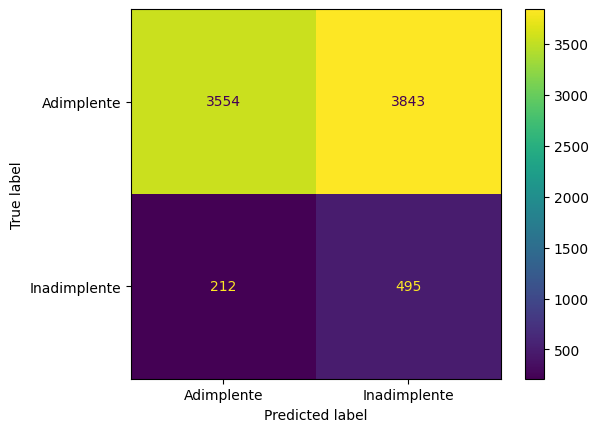

In [150]:
visualizacao_desafio = ConfusionMatrixDisplay(matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao_desafio.plot();